# Data 1030 Project

## Name: Jimmy Lin

## Link to your project github repo: (https://github.com/sirjimmylin/DATA-1030-Project.git)

## How long did you work on this project? 7.5 hours

Make sure you are in the DATA1030 environment.

## Conda Environment Setup

In [298]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


## Step 1: EDA

### Read in Data

In [299]:
import pandas as pd
import numpy as np

#read in txt file using pandas read_csv function with a tab delimiter
df = pd.read_csv('hcvdat0.csv')

#display the first few rows of the table
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [300]:
#Number of rows and columns in the dataset (rows,columns)
print(df.shape)

# Print the data types
print(df.dtypes.to_string())

print(df['Category'].value_counts())
print('This column is ordinal.')

(615, 14)
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64
This column is ordinal.


### Visualize Target Variable

In [301]:
correct_order = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']

df['Category'].value_counts().reindex(correct_order)

Category
0=Blood Donor             533
0s=suspect Blood Donor      7
1=Hepatitis                24
2=Fibrosis                 21
3=Cirrhosis                30
Name: count, dtype: int64

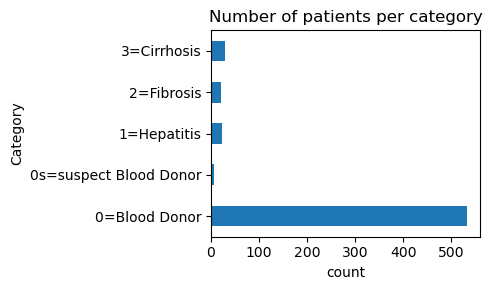

In [302]:
# import pandas as pd
# import numpy as np
# import matplotlib
from matplotlib import pylab as plt

plt.figure(figsize=(5,3))

df['Category'].value_counts().reindex(correct_order).plot.barh()
plt.xlabel('count')
plt.ylabel('Category')
plt.title('Number of patients per category')
plt.tight_layout()
plt.show()

### Column Pair Plots

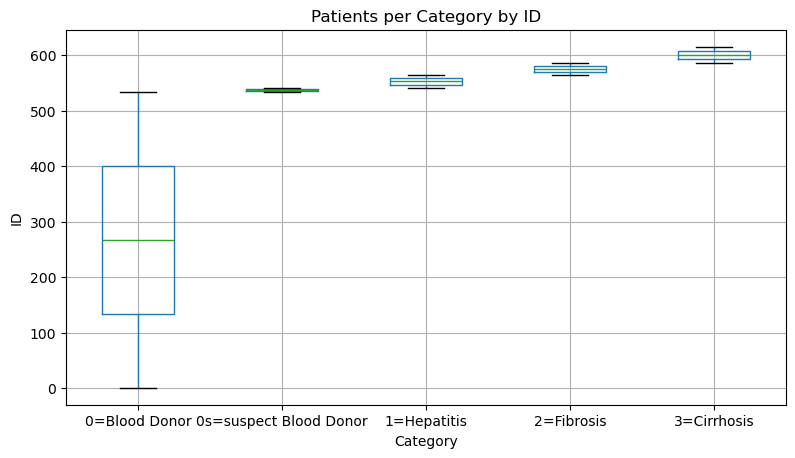

This box plot groups the ID by category.


In [303]:
df[['Category','Unnamed: 0']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by ID')
plt.xlabel('Category')
plt.ylabel('ID')
plt.show()
print('This box plot groups the ID by category.')

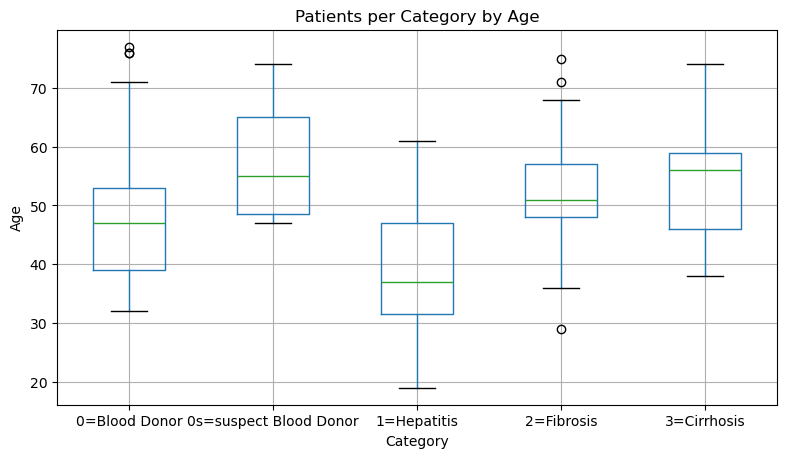

This box plot groups the age by category.


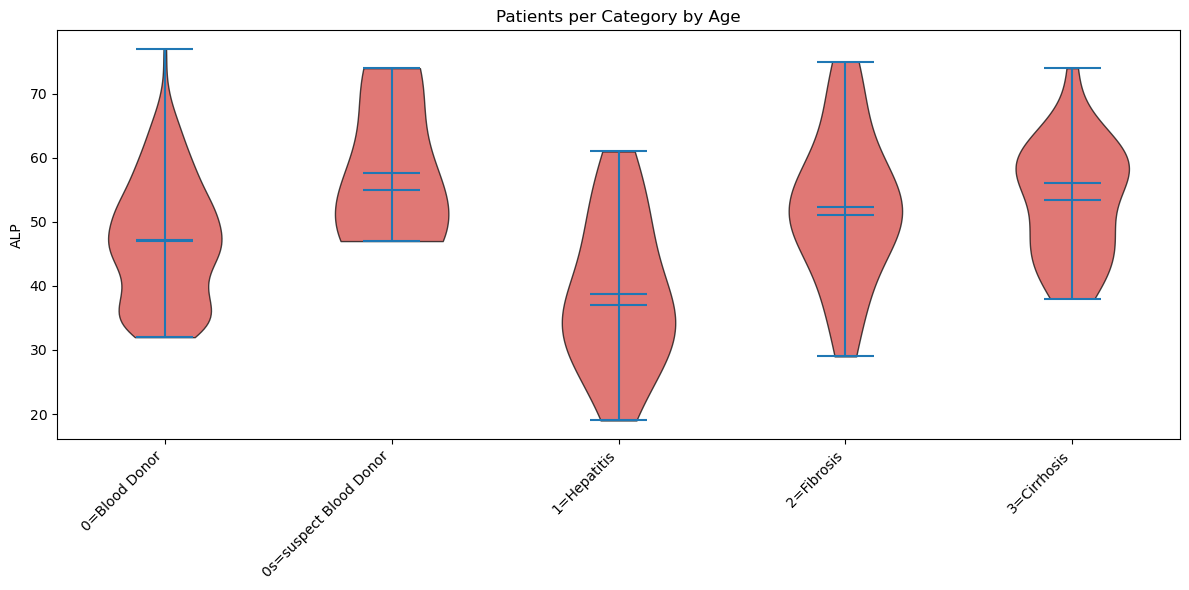

This violin plot groups the age by category.


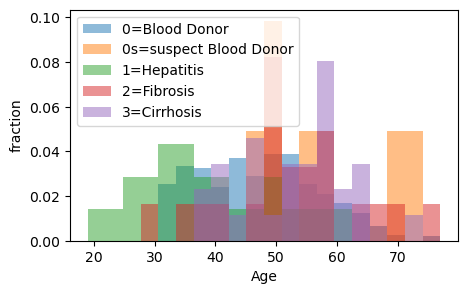

This category-specific histogram groups the age by category.


In [304]:
df[['Category','Age']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Age')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()
print('This box plot groups the age by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['Age'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['Age'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['Age'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['Age'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['Age'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALP')
plt.title('Patients per Category by Age')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the age by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['Age'].min(),df['Age'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['Category']==c]['Age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Age')
plt.show()
print('This category-specific histogram groups the age by category.')

In [305]:
count_matrix = df.groupby(['Category', 'Sex']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Sex                       f    m
Category                        
0=Blood Donor           215  318
0s=suspect Blood Donor    1    6
1=Hepatitis               4   20
2=Fibrosis                8   13
3=Cirrhosis              10   20
Sex                            f         m
Category                                  
0=Blood Donor           0.403377  0.596623
0s=suspect Blood Donor  0.142857  0.857143
1=Hepatitis             0.166667  0.833333
2=Fibrosis              0.380952  0.619048
3=Cirrhosis             0.333333  0.666667


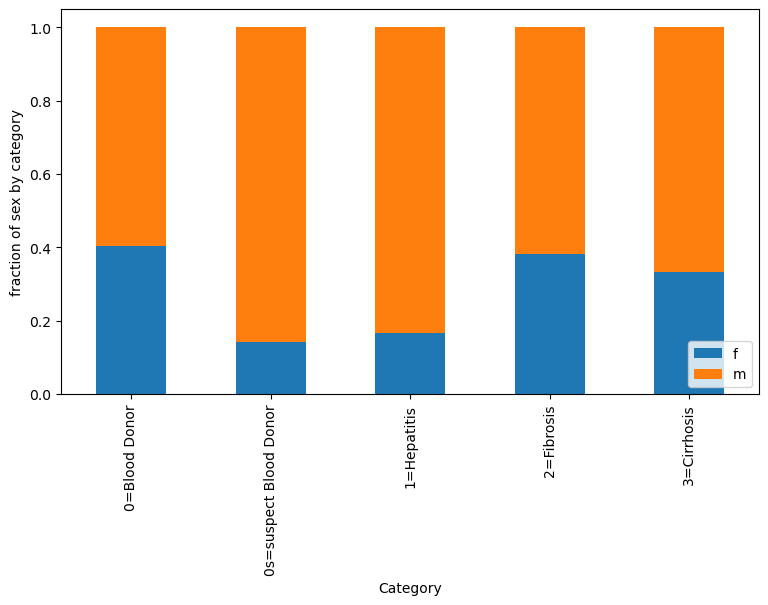

In [306]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(9,5))
plt.ylabel('fraction of sex by category')
plt.legend(loc=4)
plt.show()

In [307]:
count_matrix = df.groupby(['Sex', 'Category']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Category  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Sex                                                                        
f                   215                       1            4           8   
m                   318                       6           20          13   

Category  3=Cirrhosis  
Sex                    
f                  10  
m                  20  
Category  0=Blood Donor  0s=suspect Blood Donor  1=Hepatitis  2=Fibrosis  \
Sex                                                                        
f              0.903361                0.004202     0.016807    0.033613   
m              0.843501                0.015915     0.053050    0.034483   

Category  3=Cirrhosis  
Sex                    
f            0.042017  
m            0.053050  


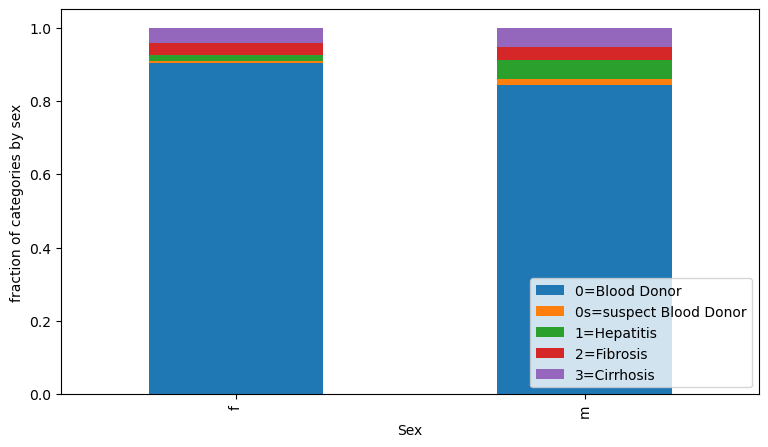

In [308]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(9,5))
plt.ylabel('fraction of categories by sex')
plt.legend(loc=4)
plt.show()

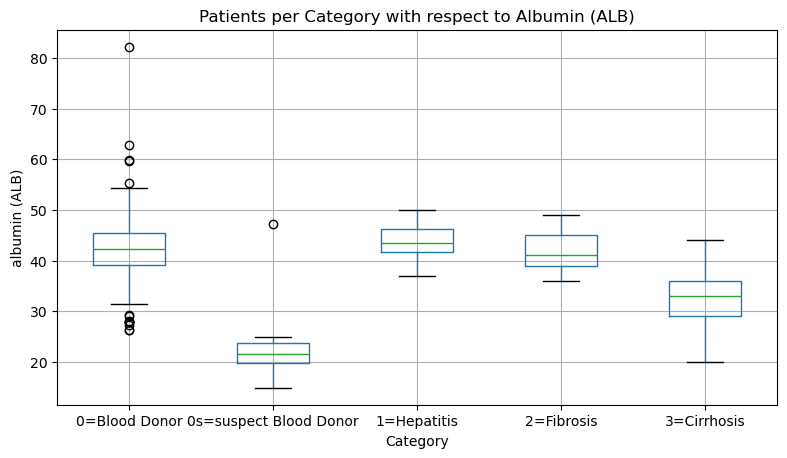

This box plot groups the albumin (ALB) by category.


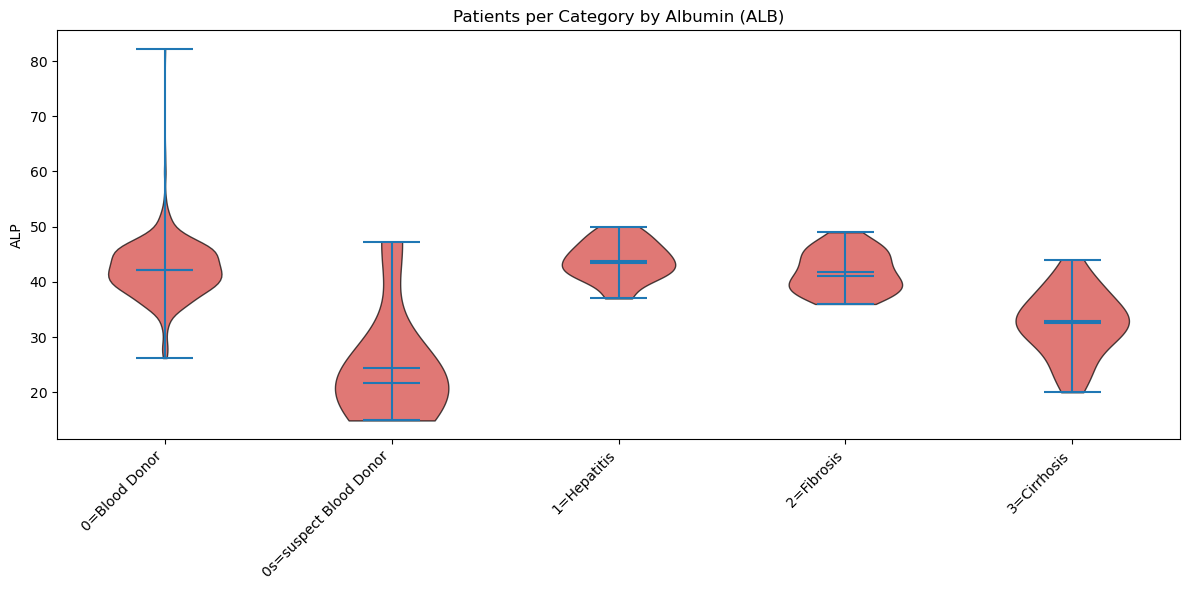

This violin plot groups the ALB by category.


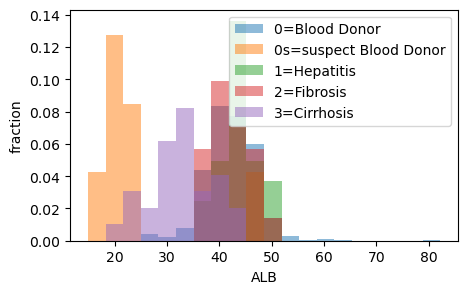

This category-specific histogram groups the ALB by category.


In [309]:
df[['Category','ALB']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category with respect to Albumin (ALB)')
plt.xlabel('Category')
plt.ylabel('albumin (ALB)')
plt.show()
print('This box plot groups the albumin (ALB) by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['ALB'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['ALB'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['ALB'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['ALB'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['ALB'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALP')
plt.title('Patients per Category by Albumin (ALB)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the ALB by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['ALB'].min(),df['ALB'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['Category']==c]['ALB'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('ALB')
plt.show()
print('This category-specific histogram groups the ALB by category.')

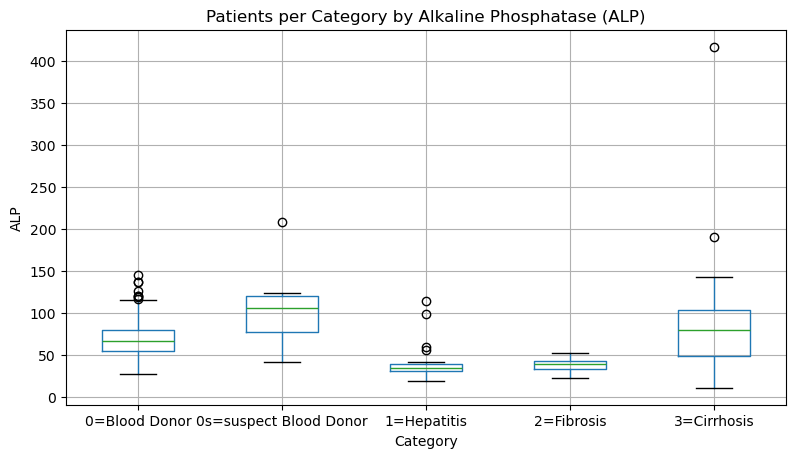

This box plot groups the ALP by category.


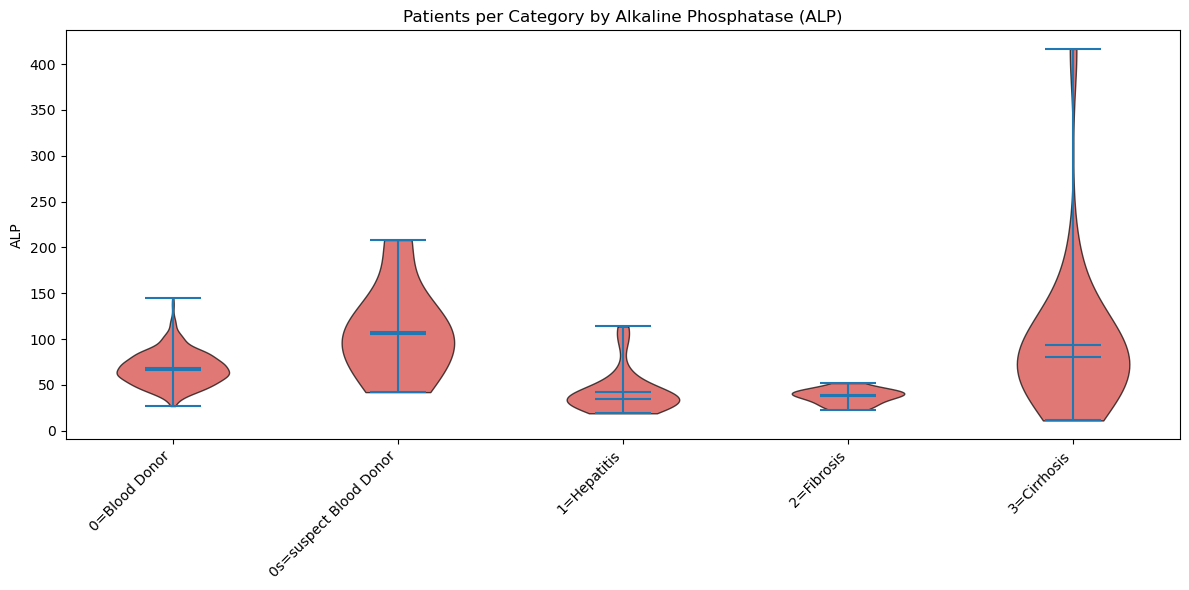

This violin plot groups the ALP by category.


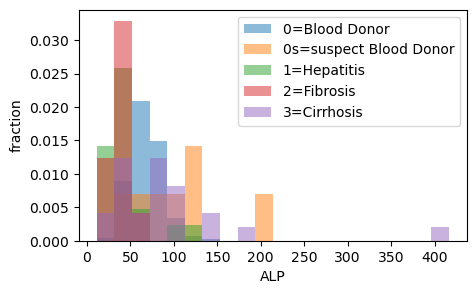

This category-specific histogram groups the ALP by category.


In [310]:
df[['Category','ALP']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Alkaline Phosphatase (ALP)')
plt.xlabel('Category')
plt.ylabel('ALP')
plt.show()
print('This box plot groups the ALP by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['ALP'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['ALP'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['ALP'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['ALP'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['ALP'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALP')
plt.title('Patients per Category by Alkaline Phosphatase (ALP)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the ALP by category.')


# dataset = [df[df['Category']=='0=Blood Donor']['ALP'].values,
#            df[df['Category']=='0s=suspect Blood Donor']['ALP'].values,
#            df[df['Category']=='1=Hepatitis']['ALP'].values,
#            df[df['Category']=='2=Fibrosis']['ALP'].values,
#            df[df['Category']=='3=Cirrhosis']['ALP'].values]

# plt.figure(figsize=(10,6))

# plt.violinplot(dataset = dataset, showmeans=True, showmedians=True)
# plt.xticks([1,2,3,4,5],['0=Blood Donor','0s=suspect Blood Donor','1=Hepatitis',' 2=Fibrosis',' 3=Cirrhosis'])
# plt.ylabel('ALP')
# plt.title('Patients per Category by Alkaline Phosphatase (ALP)')
# plt.show()
# print('This violin plot groups the ALP by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['ALP'].min(),df['ALP'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['Category']==c]['ALP'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('ALP')
plt.show()
print('This category-specific histogram groups the ALP by category.')

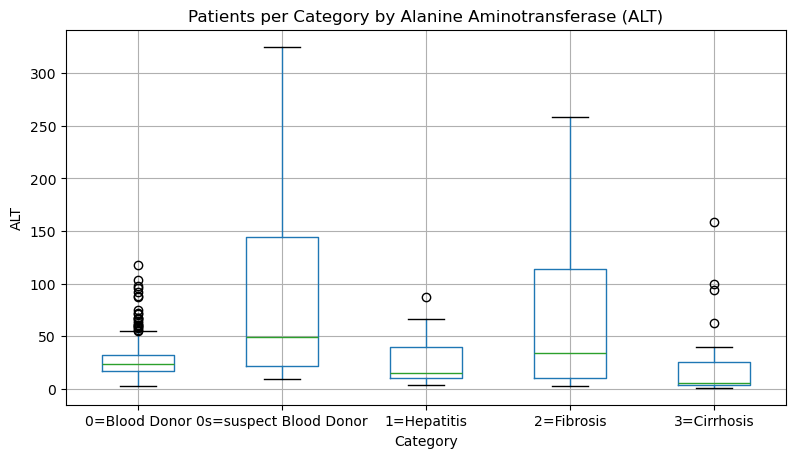

This box plot groups the ALT by category.


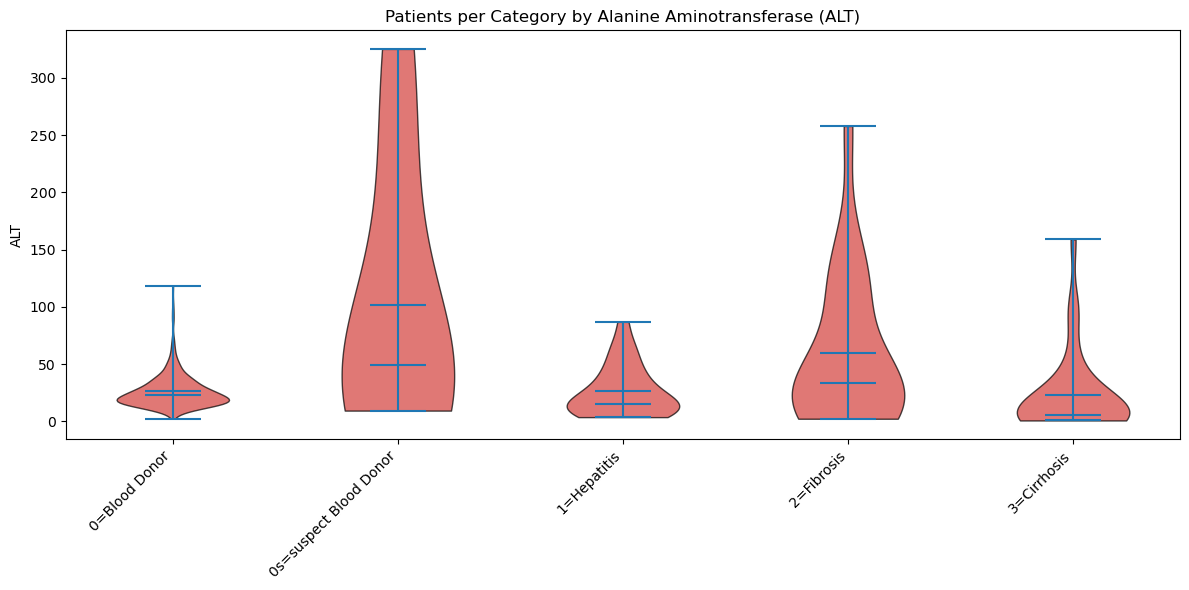

This violin plot groups the ALT by category.


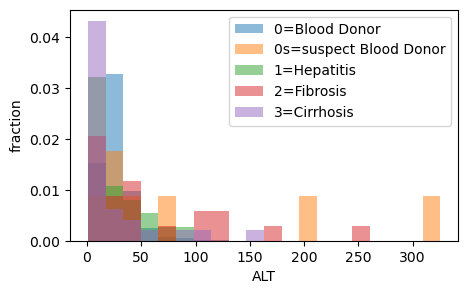

This category-specific histogram groups the ALT by category.


In [311]:
df[['Category','ALT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Alanine Aminotransferase (ALT)')
plt.xlabel('Category')
plt.ylabel('ALT')
plt.show()
print('This box plot groups the ALT by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['ALT'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['ALT'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['ALT'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['ALT'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['ALT'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALT')
plt.title('Patients per Category by Alanine Aminotransferase (ALT)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the ALT by category.')


# dataset = [df[df['Category']=='0=Blood Donor']['ALT'].values,
#            df[df['Category']=='0s=suspect Blood Donor']['ALT'].values,
#            df[df['Category']=='1=Hepatitis']['ALT'].values,
#            df[df['Category']=='2=Fibrosis']['ALT'].values,
#            df[df['Category']=='3=Cirrhosis']['ALT'].values]

# plt.figure(figsize=(10,6))

# plt.violinplot(dataset = dataset, showmeans=True, showmedians=True)
# plt.xticks([1,2,3,4,5],['0=Blood Donor','0s=suspect Blood Donor','1=Hepatitis',' 2=Fibrosis',' 3=Cirrhosis'])
# plt.ylabel('ALT')
# plt.title('Patients per Category by Alanine Aminotransferase (ALT)')
# plt.show()
# print('This violin plot groups the ALT by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['ALT'].min(),df['ALT'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['Category']==c]['ALT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('ALT')
plt.show()
print('This category-specific histogram groups the ALT by category.')

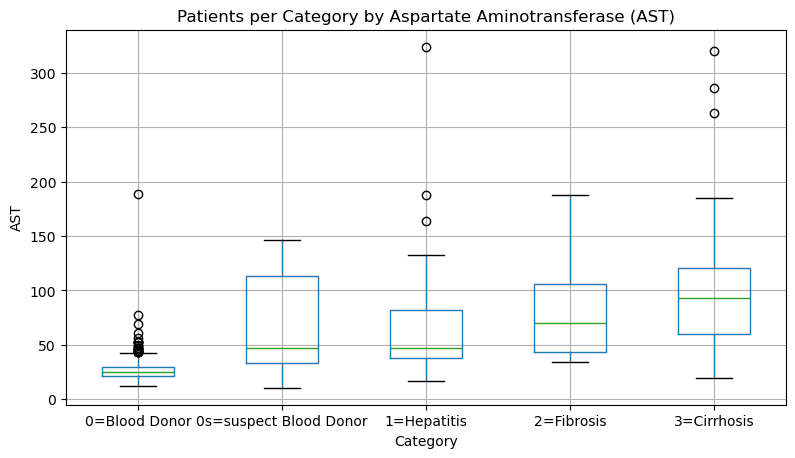

This box plot groups the AST by category.


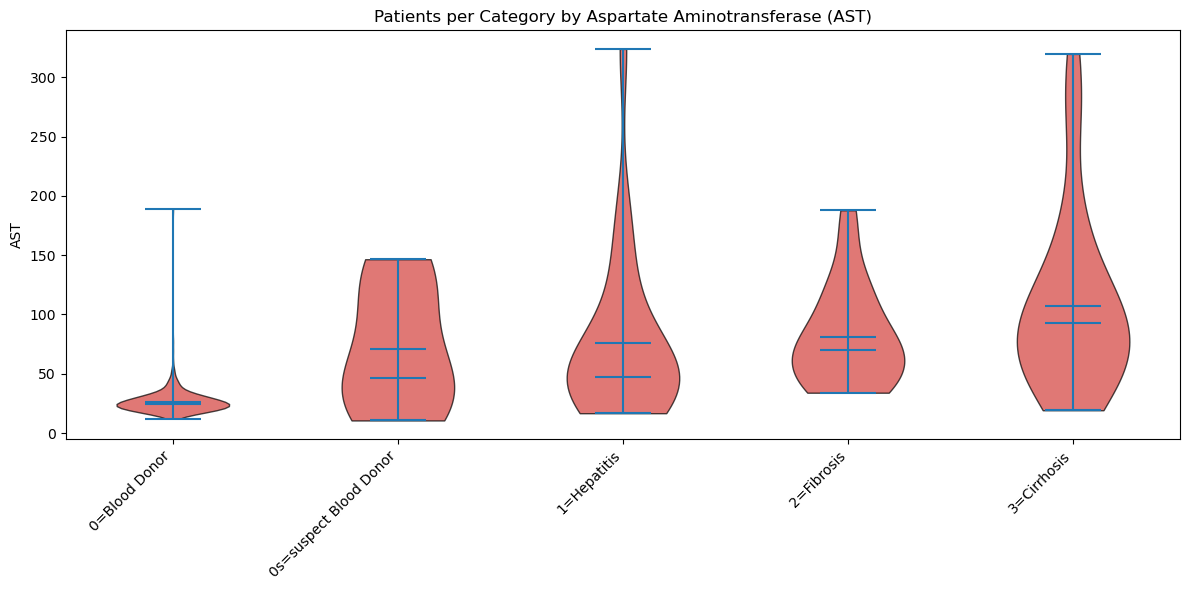

This violin plot groups the AST by category.


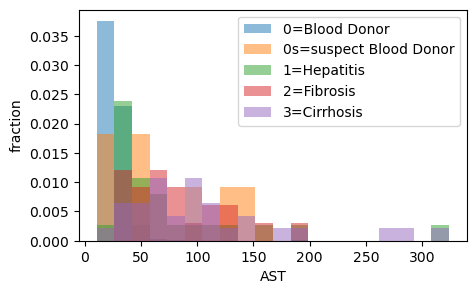

This category-specific histogram groups the AST by category.


In [312]:
df[['Category','AST']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Aspartate Aminotransferase (AST)')
plt.xlabel('Category')
plt.ylabel('AST')
plt.show()
print('This box plot groups the AST by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['AST'].dropna().values,
    df[df['Category'] == '0s=suspect Blood Donor']['AST'].dropna().values,
    df[df['Category'] == '1=Hepatitis']['AST'].dropna().values,
    df[df['Category'] == '2=Fibrosis']['AST'].dropna().values,
    df[df['Category'] == '3=Cirrhosis']['AST'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('AST')
plt.title('Patients per Category by Aspartate Aminotransferase (AST)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the AST by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['AST'].min(),df['AST'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['Category']==c]['AST'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('AST')
plt.show()
print('This category-specific histogram groups the AST by category.')

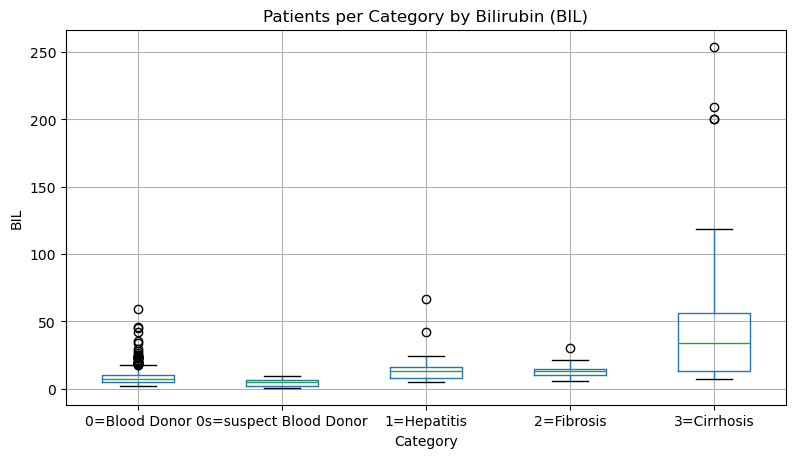

This box plot groups the BIL by category.


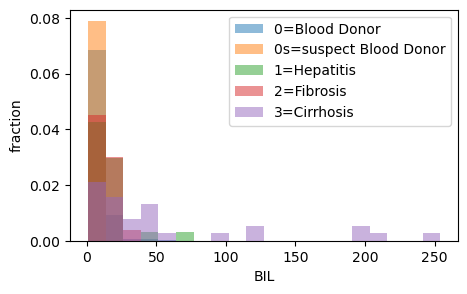

In [313]:
df[['Category','BIL']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Bilirubin (BIL)')
plt.xlabel('Category')
plt.ylabel('BIL')
plt.show()
print('This box plot groups the BIL by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['BIL'].min(),df['BIL'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['Category']==c]['BIL'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('BIL')
plt.show()



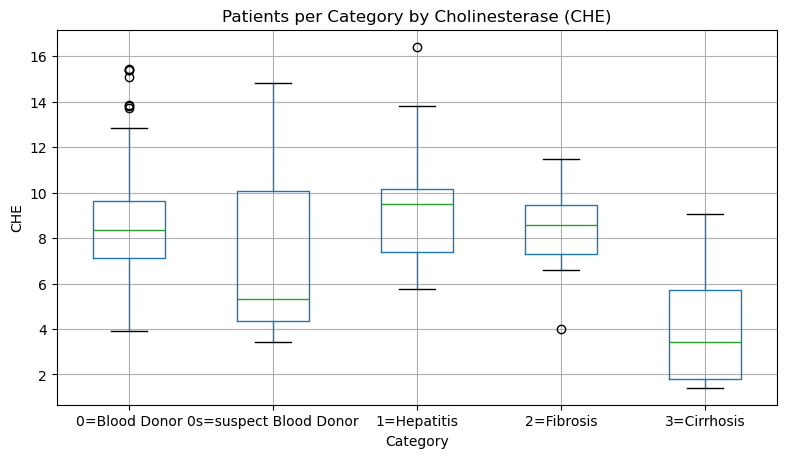

This box plot groups the CHE by category.


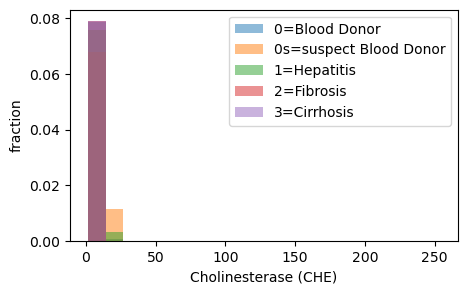

This stacked bar chart groups the CHE by category.


In [314]:
df[['Category','CHE']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Cholinesterase (CHE)')
plt.xlabel('Category')
plt.ylabel('CHE')
plt.show()
print('This box plot groups the CHE by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['CHE'].min(),df['BIL'].max())

plt.figure(figsize=(5,3))

for c in categories:
    plt.hist(df[df['Category']==c]['CHE'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Cholinesterase (CHE)')
plt.show()
print('This stacked bar chart groups the CHE by category.')

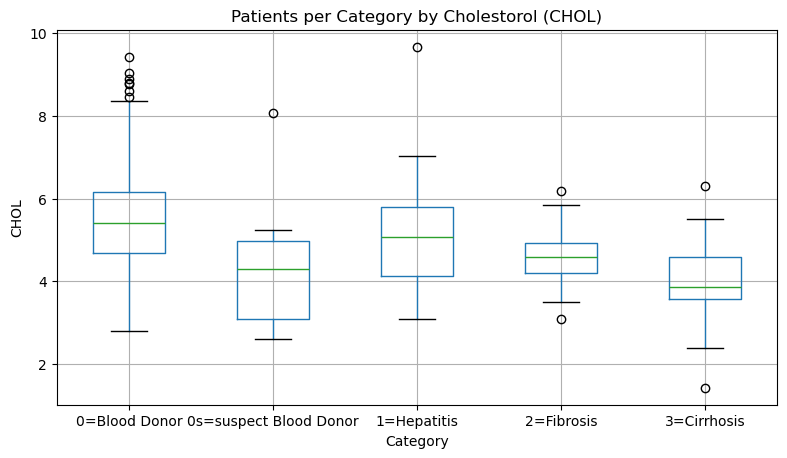

This box plot groups the CHOL by category.


In [315]:
df[['Category','CHOL']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Cholestorol (CHOL)')
plt.xlabel('Category')
plt.ylabel('CHOL')
plt.show()
print('This box plot groups the CHOL by category.')

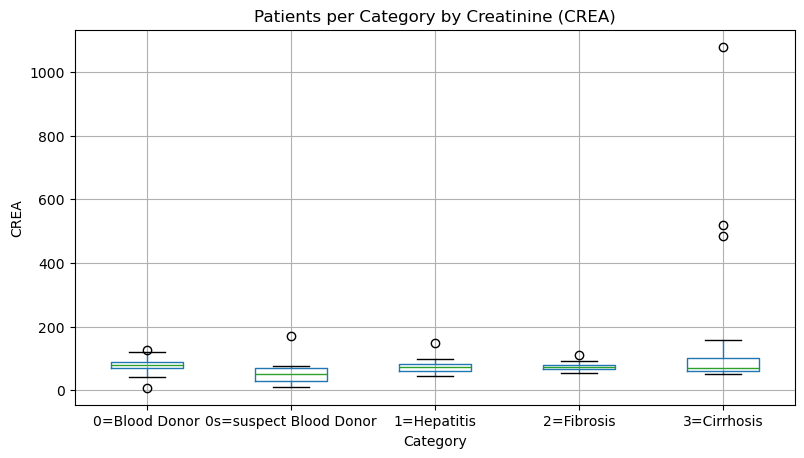

This box plot groups the CREA by category.


In [316]:
df[['Category','CREA']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Creatinine (CREA)')
plt.xlabel('Category')
plt.ylabel('CREA')
plt.show()
print('This box plot groups the CREA by category.')

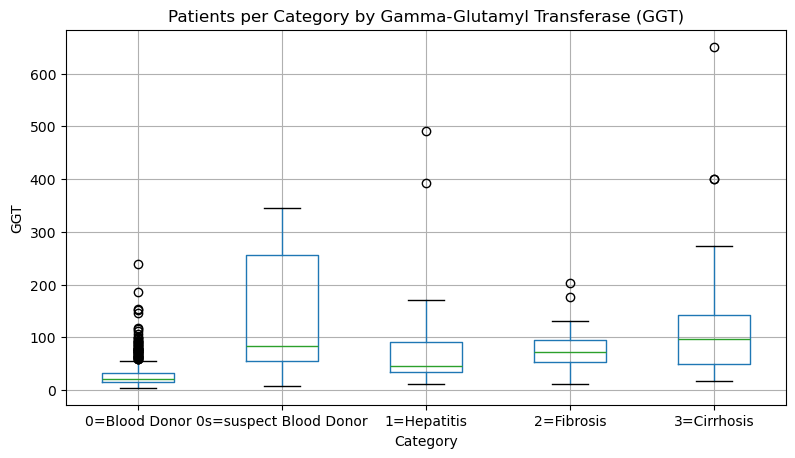

This box plot groups the GGT by category.


In [317]:
df[['Category','GGT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Gamma-Glutamyl Transferase (GGT)')
plt.xlabel('Category')
plt.ylabel('GGT')
plt.show()
print('This box plot groups the GGT by category.')

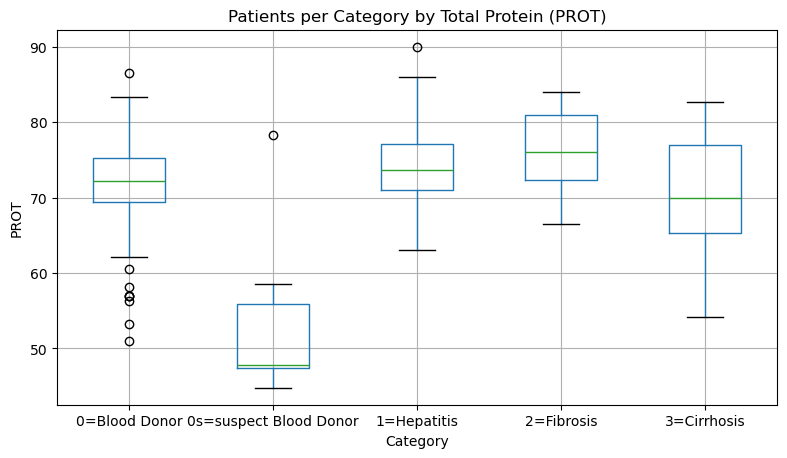

This box plot groups the PROT by category.


In [318]:
df[['Category','PROT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Total Protein (PROT)')
plt.xlabel('Category')
plt.ylabel('PROT')
plt.show()
print('This box plot groups the PROT by category.')

### Correlation Matrix

In [319]:
df_numeric = df.drop(columns=['Category', 'Unnamed: 0'])
df_numeric.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [320]:
import pandas as pd

# Converting 'Sex' to numeric values
df_numeric['Sex'] = df_numeric['Sex'].map({'m': 1, 'f': 2})


In [321]:
corr_matrix = df_numeric.corr(method='pearson', min_periods=1, numeric_only=False)
corr_matrix

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,0.024544,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
Sex,0.024544,1.000000,-0.146140,0.019825,-0.161868,-0.130891,-0.111177,-0.169111,0.030208,-0.159589,-0.133276,-0.051277
ALB,-0.197498,-0.146140,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.173340,0.019825,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,-0.006021,-0.161868,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.088666,-0.130891,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.032492,-0.111177,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.075093,-0.169111,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,0.125641,0.030208,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071
CREA,-0.022296,-0.159589,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704


/var/folders/5f/vr6wj5x522d5sydssspp10r80000gn/T/ipykernel_13906/2612980567.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1600x1400 with 0 Axes>

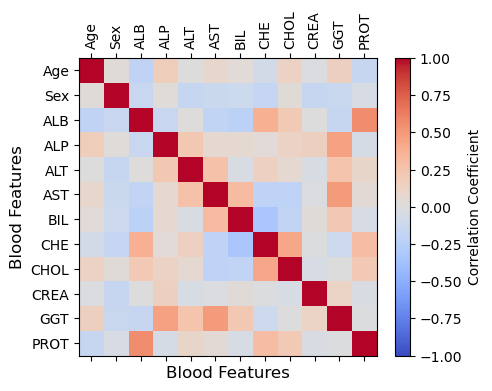

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(16, 14))

# Create the heatmap
plt.matshow(corr_matrix, fignum=None, vmin=-1, vmax=1, cmap='coolwarm')

# Adjust font size for readability
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, rotation=90, fontsize=10)
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=10)

plt.xlabel('Blood Features', fontsize=12)
plt.ylabel('Blood Features', fontsize=12)
plt.colorbar(label='Correlation Coefficient', shrink=0.8)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()


## Step 2: Splitting the Data

In [323]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop(columns=['Category','Unnamed: 0'])
y = df['Category']

def StratifiedSplit(X, y, random_state, test_size, n_splits):
    # stratified train-test split
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # do StratifiedKFold split on other
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, val_index in kf.split(X_other, y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
        print("Train set:")
        print(X_train)
        print(y_train)
        print("\nValidation set:")
        print(X_val)
        print(y_val)
        print("\nTest set:")
        print(X_test)
        print(y_test)
        print("--------------------")
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Call the function
X_train, y_train, X_val, y_val, X_test, y_test = StratifiedSplit(X, y, random_state=42, test_size=0.2, n_splits=4)

# # Now you can print X_train and y_train separately
# print("Final X_train:")
# print(X_train)
# print("\nFinal y_train:")
# print(y_train)


Train set:
     Age Sex   ALB   ALP   ALT    AST    BIL   CHE  CHOL  CREA    GGT  PROT
441   49   f  39.3  59.4  18.3   15.0    4.8  8.03  4.58  83.0   12.5  74.3
216   52   m  82.2  82.2  37.0   23.7    7.8  8.90  6.09  77.0   87.8  67.4
605   42   f  33.0  79.0   3.7   55.7  200.0  1.72  5.16  89.1  146.3  69.9
341   34   f  39.7  39.3  11.2   16.4    8.4  5.27  4.68  61.0   24.3  71.5
595   56   m  27.0  81.1  17.0  319.8   37.0  1.42  3.54  66.9   93.7  65.3
..   ...  ..   ...   ...   ...    ...    ...   ...   ...   ...    ...   ...
432   48   f  43.7  50.1  17.3   26.3    8.1  8.15  5.38  64.0   13.4  73.1
27    34   m  29.0  41.6  29.1   16.1    4.8  6.82  4.03  62.0   14.5  53.2
561   41   f  37.0  31.2   8.2   38.3    7.0  7.08  5.30  60.8   24.7  82.4
63    37   m  50.4  48.5  19.4   27.5   11.6  5.78  4.93  90.0   27.8  75.0
347   35   f  42.0  69.0  19.9   16.6   10.8  7.85  4.43  67.0   15.1  64.1

[369 rows x 12 columns]
441    0=Blood Donor
216    0=Blood Donor
605      3

In [324]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold

# X = df.drop(columns=['Category','Unnamed: 0'])
# y = df['Category']

# def StratifiedSplit(X,y,random_state,test_size,n_splits):
#     # stratified train-test split
#     X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = test_size,stratify=y,random_state=random_state)

#     # do StratifiedKFold split on other
#     kf = StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=random_state)
#     for train_index, val_index in kf.split(X_other,y_other):
#         X_train = X_other.iloc[train_index]
#         y_train = y_other.iloc[train_index]
#         X_val = X_other.iloc[val_index]
#         y_val = y_other.iloc[val_index]
#         print(f"Train set:\n{X_train,y_train}\n")
#         print(f"Validation set:\n{X_val,y_val}\n")
#         print(f"Test set:\n{X_test,y_test}\n")
#         print("--------------------")
    

# StratifiedSplit(X,y,42,0.2,4)


## Step 3: Preprocessing the Data

### Fit and Transform the Data

In [325]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# #np.random.seed(0)

# df = pd.read_csv('hcvdat0.csv')

# # let's separate the feature matrix X, and target variable y
# y = df['Category'] # remember, we want to predict who earns more than 50k or less than 50k
# X = df.loc[:, df.columns != 'Category'] # all other columns are features

# random_state = 42

# # first split to separate out the training set
# X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# # second split to separate out the validation and test sets
# X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

# print(X_train)
# print(y_train)

In [326]:
# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = [] 
ordinal_cats = []
onehot_ftrs = ['Sex']
minmax_ftrs = ['Age']
std_ftrs = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_val_prep)
print(X_test_prep)

(369, 12)
(369, 13)
[[ 0.          1.          0.17241379 ... -0.06599065 -0.05450203
   3.2602577 ]
 [ 1.          0.          0.24137931 ... -0.25717529 -0.37425025
  -0.07508084]
 [ 0.          1.          0.56896552 ... -0.09785476  0.87368137
  -0.79235794]
 ...
 [ 0.          1.          0.25862069 ... -0.33683556 -0.46560688
  -3.33869166]
 [ 1.          0.          0.37931034 ... -0.35595402 -0.27923935
   1.8974312 ]
 [ 0.          1.          0.31034483 ...  0.10926194 -0.22259824
   0.57046856]]
[[ 1.          0.          0.51724138 ... -0.00226244 -0.50214954
   0.44494507]
 [ 1.          0.          0.25862069 ... -0.35276761 -0.28654788
  -0.05714891]
 [ 0.          1.          0.62068966 ... -0.0500586  -0.17874705
   0.06837459]
 ...
 [ 0.          1.          0.27586207 ... -0.27310734 -0.21711684
   0.39114928]
 [ 0.          1.          0.62068966 ...  0.17299015  0.0532988
  -0.30819589]
 [ 1.          0.          0.27586207 ... -0.25717529 -0.45464409
  -1.38411155

### Missing Values

In [327]:
# read the data
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split

# drop the ID
df.drop(columns=['Unnamed: 0'],inplace=True)

# the target variable
y = df['Category']
df.drop(columns=['Category'],inplace=True)
# the unprocessed feature matrix
X = df
print(X.shape)
# the feature names
ftrs = df.columns
print(df.head())

(615, 12)
   Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  PROT
0   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1  69.0
1   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6  76.5
2   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2  79.3
3   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8  75.7
4   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9  68.7


In [328]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (615, 12)
fraction of missing values in features:
ALB     0.001626
ALP     0.029268
ALT     0.001626
CHOL    0.016260
PROT    0.001626
dtype: float64
data types of the features with missing values:
ALB     float64
ALP     float64
ALT     float64
CHOL    float64
PROT    float64
dtype: object
fraction of points with missing values: 0.04227642276422764


In [329]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)

(369, 12)
(123, 12)
(123, 12)
(369, 13)
(123, 13)
(123, 13)


In [330]:
# collect the various features
cat_ftrs = ['Sex']
ordinal_ftrs = []
ordinal_cats = []
num_ftrs = ['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

In [331]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

random_state = 42

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [332]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(df_val.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(369, 13)
(123, 13)
(123, 13)
['num__Age' 'num__ALB' 'num__ALP' 'num__ALT' 'num__AST' 'num__BIL'
 'num__CHE' 'num__CHOL' 'num__CREA' 'num__GGT' 'num__PROT' 'cat__Sex_f'
 'cat__Sex_m']


In [333]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df_train[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (369, 13)
fraction of missing values in features:
num__ALP     0.02981
num__ALT     0.00271
num__CHOL    0.01355
dtype: float64
data types of the features with missing values:
num__ALP     float64
num__ALT     float64
num__CHOL    float64
dtype: object
fraction of points with missing values: 0.04336043360433604


### Attempt at Linear and Nonlinear Regression

In [334]:
# your code here
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest,f_regression

feature_names = preprocessor.get_feature_names_out()
X_train_prep_df = pd.DataFrame(
    data = X_train_prep,
    columns = feature_names
)

# X_train_prep
f_statistic, p_values = f_regression(X_train_prep, y_train)
# np.argsort(X_train_prep)
# np.argsort(y_train)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': f_statistic
})
print(feature_names)
top5features = feature_importance.nlargest(5, 'Importance'
)

sorted_indices = np.argsort(f_statistic)[::-1]
sorted_top5 = sorted_indices[0:5]
print(sorted_indices)
print(sorted_top5)

f_corr = f_statistic[sorted_indices[0:5]], feature_names[sorted_indices[0:5]]
print(f_corr)

# print(selected_feature_names)
print(f_statistic)
print(p_values)
print(feature_names)

ValueError: Input X contains NaN.

### Drop Missing Values Rows and Columns

**1. Drop the columns with missing values:**

In [38]:
import pandas as pd
import numpy as np

#read in txt file using pandas read_csv function with a tab delimiter

#print the shape of the original dataset
print(df.shape)

#replace the ? with NaN so that dropna() method can locate nulls
# df = df.replace('?',np.NaN)
# drop features with missing values
df_c = df.dropna(axis=1)
print(df_c.shape)
df_c.head()

(615, 12)
(615, 7)


,Age,Sex,AST,BIL,CHE,CREA,GGT
0,32,m,22.1,7.5,6.93,106.0,12.1
1,32,m,24.7,3.9,11.17,74.0,15.6
2,32,m,52.6,6.1,8.84,86.0,33.2
3,32,m,22.6,18.9,7.33,80.0,33.8
4,32,m,24.8,9.6,9.15,76.0,29.9


**2. Drop the rows with missing values:**

In [42]:
#print the shape of the original dataset
print(df.shape)
# by default, rows/points are dropped
df_r = df.dropna()
print(df_r.shape)
df_r.head()

(615, 12)
(589, 12)


,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
